Creating and Manipulating Graphs

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);
        

In [7]:
def answer_one():
        
    # Your Code Here
    ans = nx.read_edgelist('Employee_Movie_Choices.txt', delimiter="\t")
    
    return ans

# answer_one()

<IPython.core.display.Javascript object>


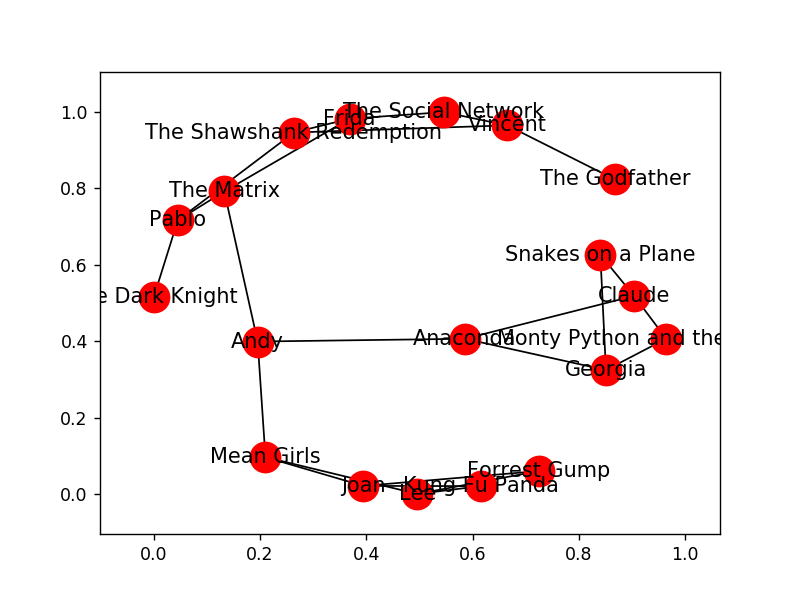

In [8]:
# plot_graph(answer_one(), weight_name=None)

In [10]:
def answer_two():
    
    # using answer one, assign to G (Graph)
    G = answer_one()
    
    # traverse the node
    for node in G.nodes():
        if node in employees:
            G.add_node(node, type="employee")
        else:
            G.add_node(node, type="movie")
    return G

# answer_two()

<IPython.core.display.Javascript object>


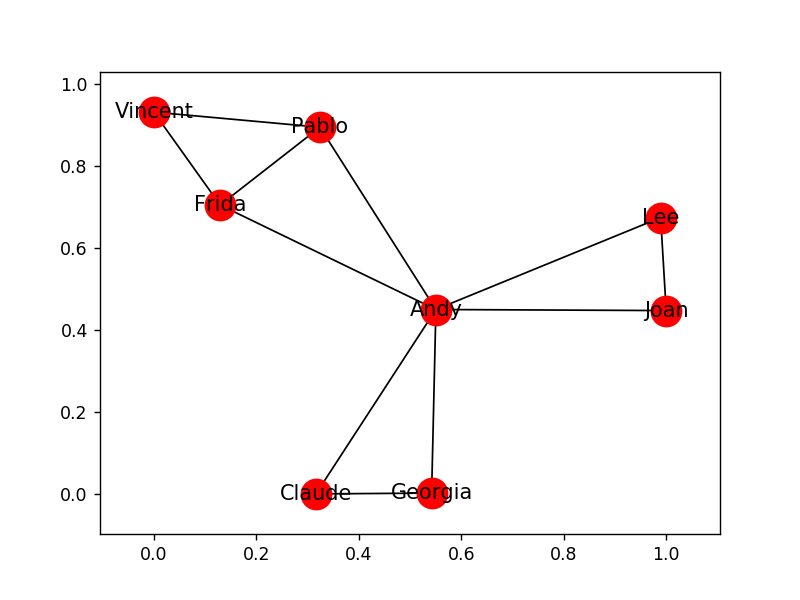

In [28]:
def answer_three():
        
    # Your Code Here
    G = answer_two()
    
    return bipartite.weighted_projected_graph(G, employees)

# answer_three()

# plot_graph(answer_three(), weight_name=None)

In [41]:
def answer_four():
        
    # Your Code Here
    
    # import value
    G = answer_three()
    Rel = nx.read_edgelist('Employee_Relationships.txt', data=[('relationship_score', int)])
    
    # make dataframe
    G_df = pd.DataFrame(G.edges(data=True), columns=['X', 'y', 'movies_score'])
    Rel_df = pd.DataFrame(Rel.edges(data=True), columns=['X', 'y', 'relationship_score'])
    
    G2_df = G_df.copy()
    
    # swap the column name
    G2_df.rename(columns={"X":"temp", "y":"X"}, inplace=True)
    G2_df.rename(columns={"temp":"y"}, inplace=True)
    
    # merge G_df and G_copy_df
    G_final_df = pd.concat([G_df, G2_df])
    
    # merge again
    final_df = pd.merge(G_final_df, Rel_df, on = ['X', 'y'], how='right')
    
    # edit movies_score 
    final_df['movies_score'] = final_df['movies_score'].map(lambda x: x['weight'] if type(x)==dict else None)
    final_df['movies_score'].fillna(value=0, inplace=True)
    
    # edit relationship_score
    final_df['relationship_score'] = final_df['relationship_score'].map(lambda x: x['relationship_score'])
    
    
    ans = final_df['movies_score'].corr(final_df['relationship_score'])

#     return G
#     return Rel
    return ans

# answer_four()

# plot_graph(answer_four(), weight_name=None)

,X,movies_score,y,relationship_score
0,Claude,3.0,Georgia,90
1,Frida,2.0,Pablo,50
2,Andy,1.0,Claude,0
3,Frida,2.0,Vincent,60
4,Pablo,1.0,Vincent,-20
5,Andy,1.0,Lee,-10
6,Joan,3.0,Lee,70
7,Andy,1.0,Frida,20
8,Andy,1.0,Georgia,-10
9,Andy,1.0,Joan,30
